####  import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [4]:
df = pd.read_csv('/content/income.csv')

In [5]:
df.head()

,age,partnered,children,income
0,35.0,1,1,56531.361287
1,58.0,1,2,93026.182530
2,49.0,1,0,42693.010819
3,44.0,1,0,83680.128218
4,26.0,0,1,28845.520835


In [6]:
df.tail()

,age,partnered,children,income
95,40.0,1,1,74090.088031
96,41.0,1,1,52304.403273
97,37.0,0,3,10688.919618
98,21.0,0,4,68232.834868
99,24.0,1,4,36785.514708


In [7]:
features=['age','children','income']
X=df[features]
y=df['partnered']

In [8]:
y

0     1
1     1
2     1
3     1
4     0
     ..
95    1
96    1
97    0
98    0
99    1
Name: partnered, Length: 100, dtype: int64

# Linear Regression model

In [9]:
lr = LinearRegression()

#Baseline score

In [10]:
cross_val_score(lr,X,y,cv=5).mean()

-0.06576950325262183

#  Interaction terms  #######
#df['Interaction Col'] = df['Column 1'] * df['Column 2']

In [11]:
df['age * children'] = df['age'] * df['children']

In [12]:
df.head()

,age,partnered,children,income,age * children
0,35.0,1,1,56531.361287,35.0
1,58.0,1,2,93026.182530,116.0
2,49.0,1,0,42693.010819,0.0
3,44.0,1,0,83680.128218,0.0
4,26.0,0,1,28845.520835,26.0


In [13]:
df.columns

Index(['age', 'partnered', 'children', 'income', 'age * children'], dtype='object')

### EDA: Create a heatmap

<Axes: >

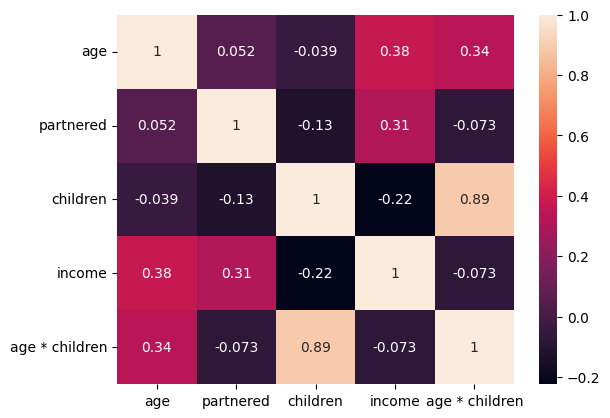

In [14]:
sns.heatmap(df.corr(),annot=True)

#EDA: Pairplot

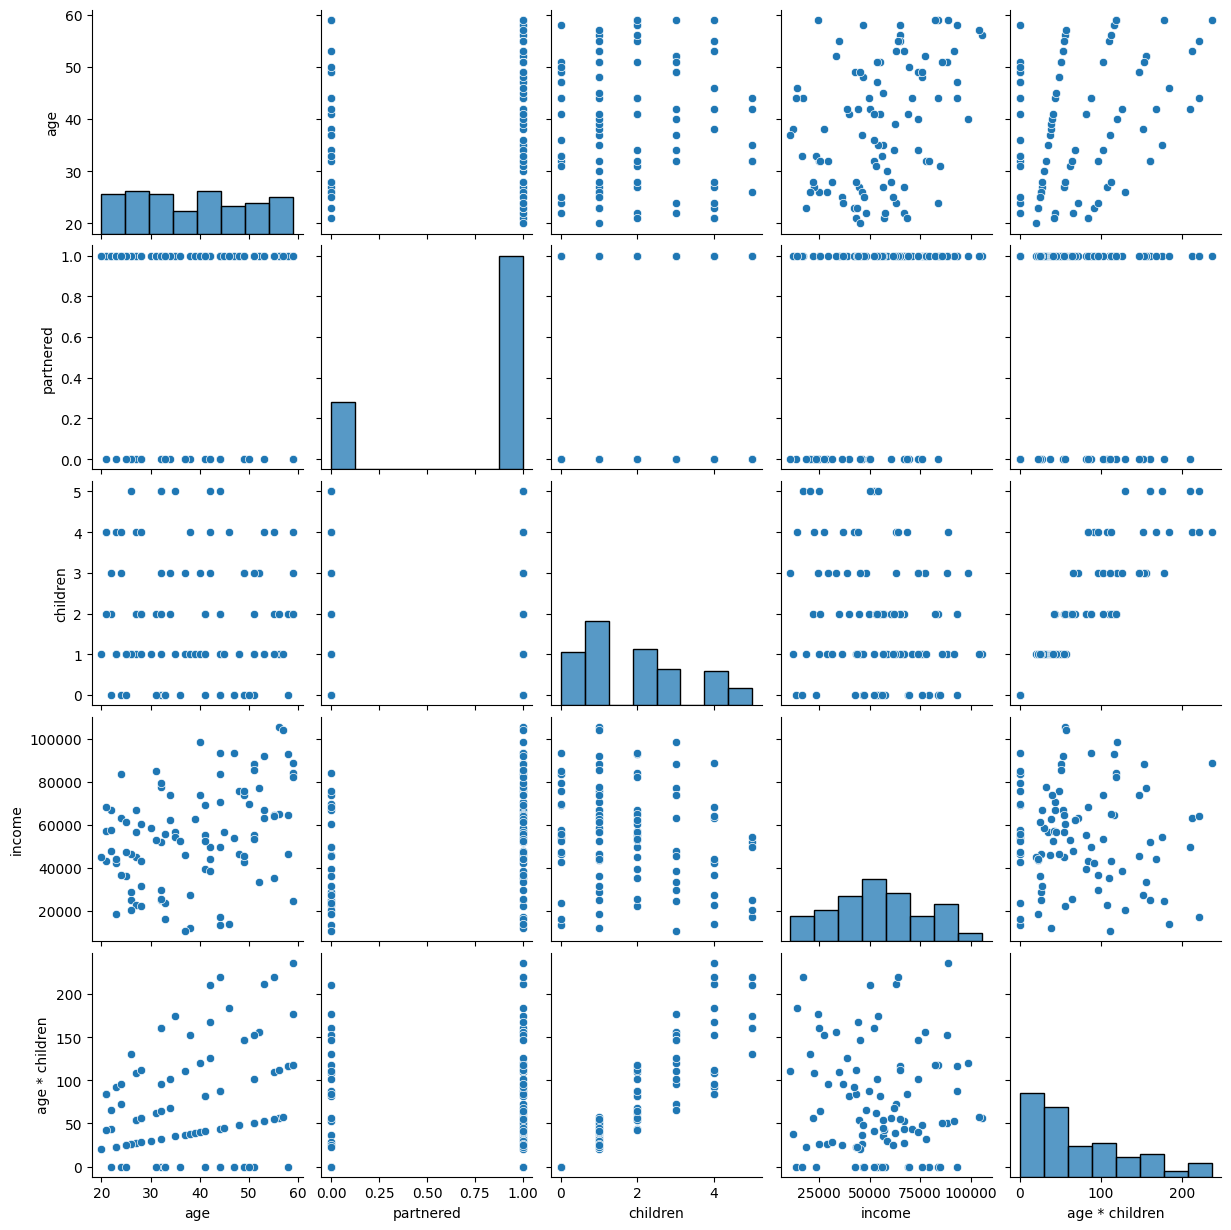

In [15]:
sns.pairplot(df)

#Create our features matrix (X) and target vector (y)

In [16]:
features.append('age * children')

In [17]:
features

['age', 'children', 'income', 'age * children']

In [18]:
X = df[features]

#Model evaluation
#Use cross_val_score to see how much our new feature moves the  R2  score.

In [19]:
scores=cross_val_score(lr,X,y,cv=5)

In [20]:
scores.mean()

-0.08167472207922447

# PolynomialFeatures

In [21]:
features=['age','children','income']

In [22]:
X=df[features]

In [23]:
X.head()

,age,children,income
0,35.0,1,56531.361287
1,58.0,2,93026.182530
2,49.0,0,42693.010819
3,44.0,0,83680.128218
4,26.0,1,28845.520835


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: partnered, dtype: int64

In [25]:
cross_val_score(lr,X,y,cv=5).mean()

-0.06576950325262183

## Polynomical faeture engg

In [26]:
# Polynomical faeture engg

poly=PolynomialFeatures(include_bias=False,degree=3)

In [27]:
X_poly=poly.fit_transform(X)

In [28]:
X_poly

array([[3.50000000e+01, 1.00000000e+00, 5.65313613e+04, ...,
        5.65313613e+04, 3.19579481e+09, 1.80662631e+14],
       [5.80000000e+01, 2.00000000e+00, 9.30261825e+04, ...,
        3.72104730e+05, 1.73077413e+10, 8.05036549e+14],
       [4.90000000e+01, 0.00000000e+00, 4.26930108e+04, ...,
        0.00000000e+00, 0.00000000e+00, 7.78162593e+13],
       ...,
       [3.70000000e+01, 3.00000000e+00, 1.06889196e+04, ...,
        9.62002766e+04, 3.42759008e+08, 1.22124116e+12],
       [2.10000000e+01, 4.00000000e+00, 6.82328349e+04, ...,
        1.09172536e+06, 1.86228790e+10, 3.17672957e+14],
       [2.40000000e+01, 4.00000000e+00, 3.67855147e+04, ...,
        5.88568235e+05, 5.41269637e+09, 4.97772055e+13]])

In [29]:
X_poly.shape

(100, 19)

In [30]:
pd.DataFrame(X_poly,columns=poly.get_feature_names_out(features))

,age,children,income,age^2,age children,age income,children^2,children income,income^2,age^3,age^2 children,age^2 income,age children^2,age children income,age income^2,children^3,children^2 income,children income^2,income^3
0,35.0,1.0,56531.361287,1225.0,35.0,1.978598e+06,1.0,56531.361287,3.195795e+09,42875.0,1225.0,6.925092e+07,35.0,1.978598e+06,1.118528e+11,1.0,5.653136e+04,3.195795e+09,1.806626e+14
1,58.0,2.0,93026.182530,3364.0,116.0,5.395519e+06,4.0,186052.365059,8.653871e+09,195112.0,6728.0,3.129401e+08,232.0,1.079104e+07,5.019245e+11,8.0,3.721047e+05,1.730774e+10,8.050365e+14
2,49.0,0.0,42693.010819,2401.0,0.0,2.091958e+06,0.0,0.000000,1.822693e+09,117649.0,0.0,1.025059e+08,0.0,0.000000e+00,8.931197e+10,0.0,0.000000e+00,0.000000e+00,7.781626e+13
3,44.0,0.0,83680.128218,1936.0,0.0,3.681926e+06,0.0,0.000000,7.002364e+09,85184.0,0.0,1.620047e+08,0.0,0.000000e+00,3.081040e+11,0.0,0.000000e+00,0.000000e+00,5.859587e+14
4,26.0,1.0,28845.520835,676.0,26.0,7.499835e+05,1.0,28845.520835,8.320641e+08,17576.0,676.0,1.949957e+07,26.0,7.499835e+05,2.163367e+10,1.0,2.884552e+04,8.320641e+08,2.400132e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,40.0,1.0,74090.088031,1600.0,40.0,2.963604e+06,1.0,74090.088031,5.489341e+09,64000.0,1600.0,1.185441e+08,40.0,2.963604e+06,2.195736e+11,1.0,7.409009e+04,5.489341e+09,4.067058e+14
96,41.0,1.0,52304.403273,1681.0,41.0,2.144481e+06,1.0,52304.403273,2.735751e+09,68921.0,1681.0,8.792370e+07,41.0,2.144481e+06,1.121658e+11,1.0,5.230440e+04,2.735751e+09,1.430918e+14
97,37.0,3.0,10688.919618,1369.0,111.0,3.954900e+05,9.0,32066.758853,1.142530e+08,50653.0,4107.0,1.463313e+07,333.0,1.186470e+06,4.227361e+09,27.0,9.620028e+04,3.427590e+08,1.221241e+12
98,21.0,4.0,68232.834868,441.0,84.0,1.432890e+06,16.0,272931.339472,4.655720e+09,9261.0,1764.0,3.009068e+07,336.0,5.731558e+06,9.777011e+10,64.0,1.091725e+06,1.862288e+10,3.176730e+14


#Model evaluation :
#Use cross_val_score to see how much PolynomialFeatures affects the  R2  score.

In [31]:
X_poly.shape

(100, 19)

In [32]:
cross_val_score(lr,X_poly,y).mean()

-0.9942311796271742

#Scaling

In [33]:
(df['age']-df['age'].mean())/df['age'].std()

0    -0.320145
1     1.612490
2     0.856241
3     0.436103
4    -1.076394
        ...   
95    0.099993
96    0.184020
97   -0.152090
98   -1.496532
99   -1.244449
Name: age, Length: 100, dtype: float64

In [34]:
X

,age,children,income
0,35.0,1,56531.361287
1,58.0,2,93026.182530
2,49.0,0,42693.010819
3,44.0,0,83680.128218
4,26.0,1,28845.520835
...,...,...,...
95,40.0,1,74090.088031
96,41.0,1,52304.403273
97,37.0,3,10688.919618
98,21.0,4,68232.834868


#StandardScaler

In [35]:
ss=StandardScaler()

In [36]:
ss.fit(X)

StandardScaler()

In [37]:
X_scaled=ss.transform(X)

In [38]:
X_scaled

array([[-0.32175806, -0.58747587,  0.0695507 ],
       [ 1.62061345,  0.08778375,  1.66234343],
       [ 0.86055503, -1.2627355 , -0.5344151 ],
       [ 0.43830036, -1.2627355 ,  1.25444097],
       [-1.08181649, -0.58747587, -1.13877979],
       [-1.08181649, -0.58747587, -1.31103006],
       [-1.41962023,  0.08778375,  0.53308192],
       [ 1.36726065,  0.08778375, -0.86810396],
       [ 0.43830036,  2.11356262, -1.64503901],
       [ 0.7761041 , -0.58747587,  0.90831513],
       [-1.50407116,  0.08778375,  0.09772701],
       [ 1.70506439,  1.438303  ,  1.47180502],
       [ 1.19835878, -0.58747587,  0.53034334],
       [-0.91291461,  0.08778375,  0.24420715],
       [-0.99736555, -0.58747587,  0.51574861],
       [-0.99736555,  1.438303  , -1.41118641],
       [-0.57511087,  2.11356262, -1.3054027 ],
       [ 0.18494755,  0.08778375,  0.00732324],
       [-0.15285619, -0.58747587, -0.38312023],
       [-0.57511087,  0.76304338, -1.10789871],
       [ 0.43830036,  0.08778375, -0.223

In [39]:
X_scaled_2=ss.fit_transform(X)

In [40]:
X_scaled_2

array([[-0.32175806, -0.58747587,  0.0695507 ],
       [ 1.62061345,  0.08778375,  1.66234343],
       [ 0.86055503, -1.2627355 , -0.5344151 ],
       [ 0.43830036, -1.2627355 ,  1.25444097],
       [-1.08181649, -0.58747587, -1.13877979],
       [-1.08181649, -0.58747587, -1.31103006],
       [-1.41962023,  0.08778375,  0.53308192],
       [ 1.36726065,  0.08778375, -0.86810396],
       [ 0.43830036,  2.11356262, -1.64503901],
       [ 0.7761041 , -0.58747587,  0.90831513],
       [-1.50407116,  0.08778375,  0.09772701],
       [ 1.70506439,  1.438303  ,  1.47180502],
       [ 1.19835878, -0.58747587,  0.53034334],
       [-0.91291461,  0.08778375,  0.24420715],
       [-0.99736555, -0.58747587,  0.51574861],
       [-0.99736555,  1.438303  , -1.41118641],
       [-0.57511087,  2.11356262, -1.3054027 ],
       [ 0.18494755,  0.08778375,  0.00732324],
       [-0.15285619, -0.58747587, -0.38312023],
       [-0.57511087,  0.76304338, -1.10789871],
       [ 0.43830036,  0.08778375, -0.223

In [41]:
lr.fit(X_scaled,y)

LinearRegression()

In [42]:
print(lr.intercept_)
print(lr.coef_)

0.76
[-0.03111513 -0.0246907   0.13976065]


In [43]:
lr.score(X_scaled,y)

0.10599429475454536

In [44]:
cross_val_score(lr,X_scaled,y,cv=5).mean()

-0.06576950325265354

#Dummies:When we dummy a column, we're converting a categorical column into a one-hot encoded matrix. pandas allows us to do this with the pd.get_dummies() method.

In [45]:
un = pd.read_csv('/content/UNdata.csv')

In [46]:
un.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


In [48]:
un.tail()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
183,Viet.Nam,Asia,64.9,69.6,37,270
184,Yemen,Asia,57.4,58.4,80,732
185,Yugoslavia,Europe,69.8,75.3,19,1487
186,Zambia,Africa,42.2,43.7,103,382
187,Zimbabwe,Africa,47.6,49.4,68,786


In [56]:
un.columns

Index(['country', 'region', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita'],
      dtype='object')

In [49]:
un[['country']]

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
183,Viet.Nam
184,Yemen
185,Yugoslavia
186,Zambia


In [53]:
pd.get_dummies(un[['country']])

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,...,country_United.States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet.Nam,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
pd.get_dummies(un, columns = ['country'	,'region'], drop_first=True)

,lifeMale,lifeFemale,infantMortality,GDPperCapita,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,...,country_Venezuela,country_Viet.Nam,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe,region_America,region_Asia,region_Europe,region_Oceania
0,45.0,46.0,154,2848,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,68.0,74.0,32,863,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,67.5,70.3,44,1531,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44.9,48.1,124,355,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69.6,76.8,22,8055,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,64.9,69.6,37,270,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
184,57.4,58.4,80,732,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
185,69.8,75.3,19,1487,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
186,42.2,43.7,103,382,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#end